- Author: Maximiliano Lopez Salgado
- First Commit: 2023-06-20                      #folowing ISO  8601 Format
- Last Commit: 2023-07-07                       #folowing ISO  8601 Format
- Description: This notebook is used to perform EDA on the Superstore dataset

In [137]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Machine Learning

This jupyter notebook is meant to perform a basic, but useful ML model. We will be performing the next actions:

**Importing Data**

- Read the "superstore_df.csv" file into a DataFrame named "superstore_df".
- Display the head, information, and summary statistics of the "superstore_df" DataFrame.

**Exploratory Data Analysis**

- Visualize correlations between variables using a heatmap.

**Data Preprocessing**

- Drop a highly correlated column from the DataFrame.
- Drop outliers

**Data Distribution**

- Plot histograms to visualize the distribution of the data.

**Linearity Analysis**

- Create scatter plots to analyze linearity between variables.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------
**Encoding Categorical Variables**

- Encode categorical variables using one-hot encoding and create new columns for each category.

**Splitting Data**

- Split the data into train and test sets.

**Scaling Data**

- Scale the data using Min-Max scaling.

**Model Training and Prediction**

- Train a linear regression model on the scaled training data.
- Make predictions on the scaled validation data.

**Model Evaluation**

- Calculate and display evaluation metrics:
  - KMeans

**Residual Analysis**

- Plot the residuals between the true and predicted values.

# KMeans Algorithm

According to the documentation, " (the) KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares... This algorithm requires the number of clusters to be specified, " which is what the k stands for in the name of the algorithm. Inertia, on the other hand, "... can be recognized as a measure of how internally coherent clusters are." For more information about these concepts, visit the official documentation in the link we have provided. We will only look at the K-means clustering method because it is the most widely used.

In [104]:
# Import data
superstore_df = pd.read_csv('../datasets/Sample-Superstore.csv', encoding='latin1')

# Explore data
display(superstore_df.head())
display(superstore_df.info())
display(superstore_df.describe(include='all'))

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

None

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [105]:
# From the columns with numerical values, drop the ones who are not relevant for the analysis
superstore_df= superstore_df.drop(['Row ID', 'Postal Code'], axis=1)

<Axes: >

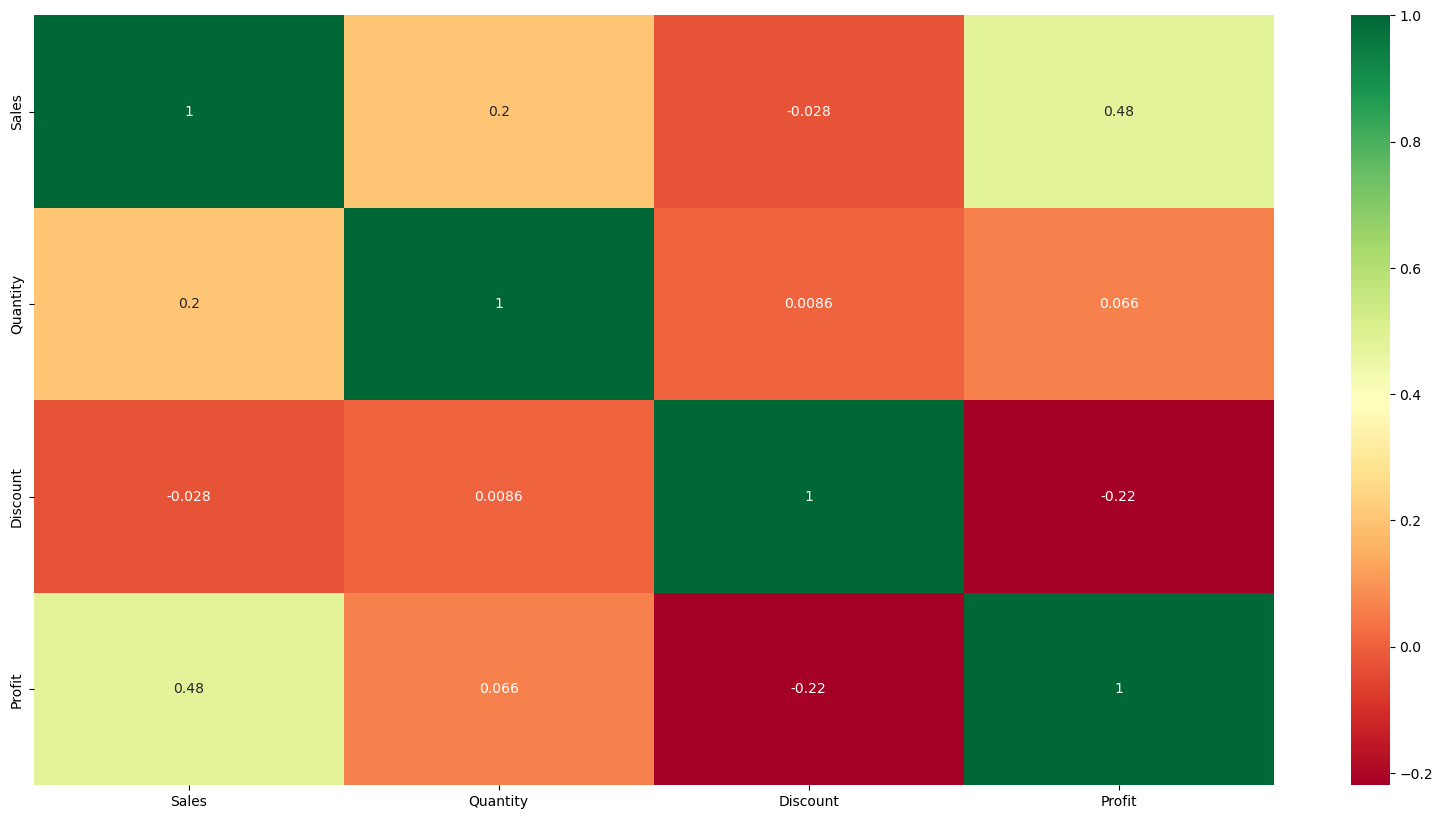

In [106]:
# Search for correlations between the variables in a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(superstore_df.corr(), annot=True, cmap='RdYlGn')

array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Discount'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

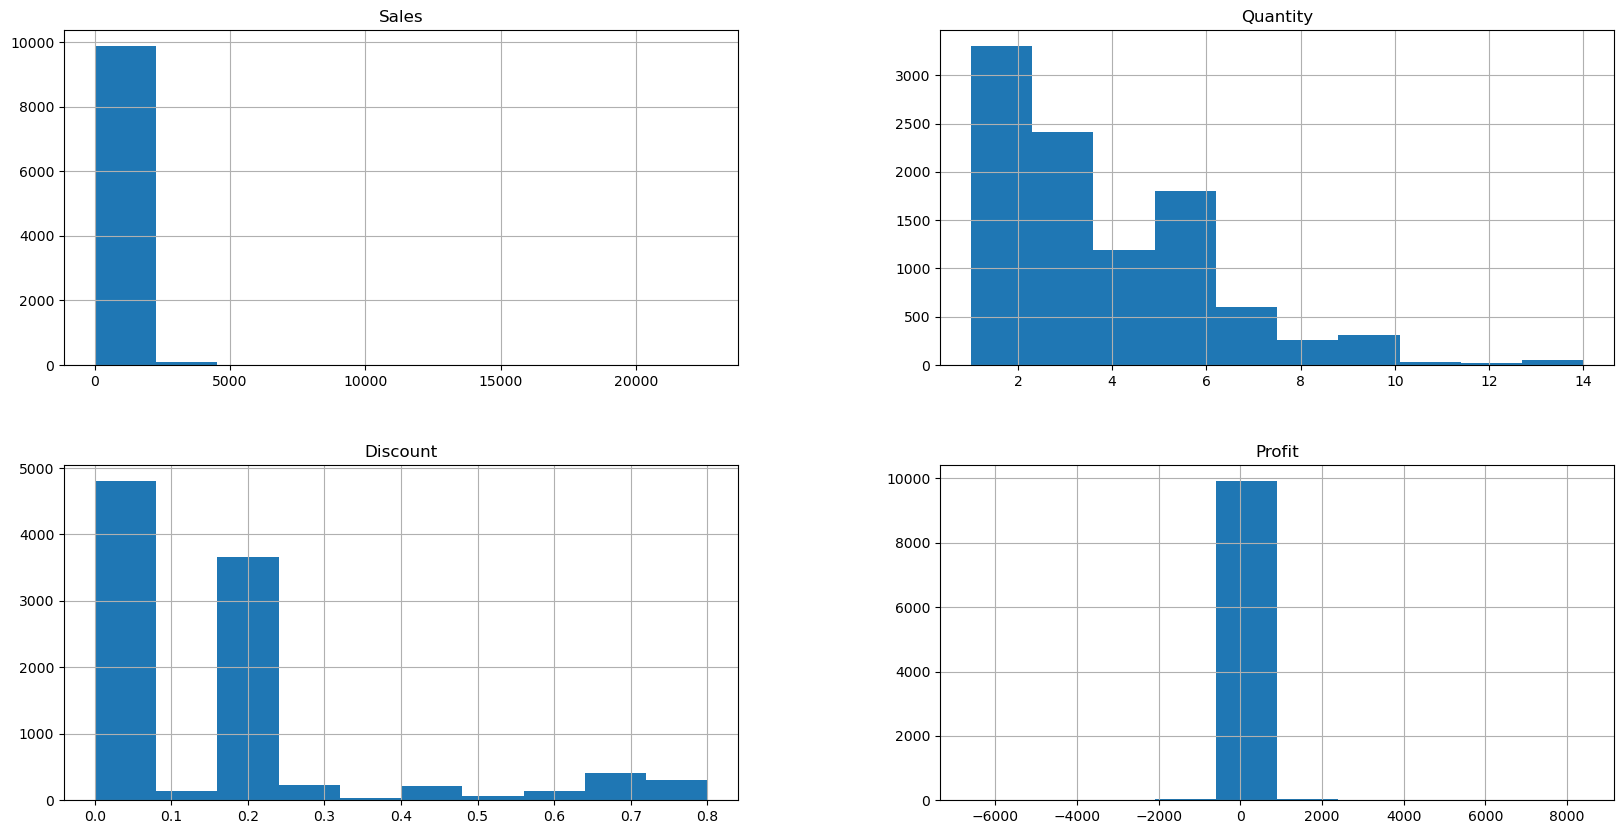

In [107]:
# Take a look of the distribution of the data
superstore_df.hist(figsize=(20, 10))

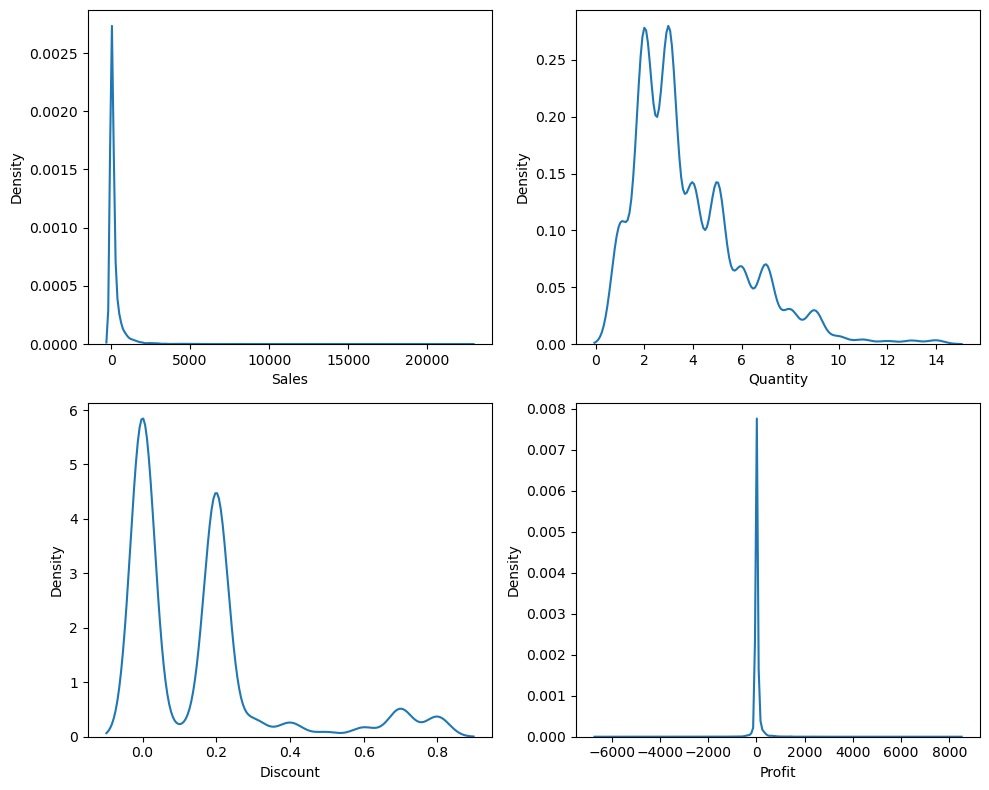

In [108]:
# Search for linearity between the variables
# These are Kernel density estimation plots for each combination of variables. 
# The data parameter specifies the DataFrame (superstore_df), and x specifies the column to plot.
columns = [['Sales', 'Quantity'],
           ['Discount', 'Profit']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i in range(2):
    for j in range(2):
        sns.kdeplot(data=superstore_df, x=columns[i][j], ax=axes[i][j])

plt.tight_layout()
plt.show()

## Clustering

When working with sales data, a common thing to do is to understand the customers' buying patterns using 3 parameters: Monetary (amount of money spent), Frequency (how frequently the customer bought something) Recency (how many days has passed from today to their last purchase).

These parameters are not given to us; we will have to calculate them.

### Sales Column

In [109]:
# Create a new DataFrame by grouping the customers based on their ID and summing the Sales column:
superstore_monetary = superstore_df.groupby('Customer ID')['Sales'].sum()
superstore_monetary = superstore_monetary.reset_index()
superstore_monetary.columns = ['Customer ID', 'Amount']
superstore_monetary.head()

,Customer ID,Amount
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156


### Frequency

In [110]:
# Create a new DataFrame by considering How many unique Order IDs are there per customer:
superstore_frequency = superstore_df.groupby('Customer ID')['Order ID'].nunique()
superstore_frequency = superstore_frequency.reset_index()
superstore_frequency.columns = ['Customer ID', 'Frequency']
superstore_frequency.head()

,Customer ID,Frequency
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3


### Recency

In [111]:
# Create a new DataFrame considering the last order date in the dataset:
superstore_recency = superstore_df.groupby('Customer ID')['Order Date'].max()
superstore_recency = superstore_recency.reset_index()
superstore_recency.columns = ['Customer ID', 'Last Order Date']
superstore_recency.head()

,Customer ID,Last Order Date
0,AA-10315,9/15/2014
1,AA-10375,9/7/2017
2,AA-10480,8/26/2016
3,AA-10645,9/4/2016
4,AB-10015,3/7/2014


### Concatenate / Merge Monetary, Frequency and Recency dataframes


In [112]:
### Concatenate / Merge Monetary, Frequency and Recency dataframes
mfr_df = pd.merge(superstore_monetary, superstore_frequency, on='Customer ID')
mfr_df = pd.merge(mfr_df, superstore_recency, on='Customer ID')
display(mfr_df.head())


,Customer ID,Amount,Frequency,Last Order Date
0,AA-10315,5563.560,5,9/15/2014
1,AA-10375,1056.390,9,9/7/2017
2,AA-10480,1790.512,4,8/26/2016
3,AA-10645,5086.935,6,9/4/2016
4,AB-10015,886.156,3,3/7/2014


## Dealing with outliers


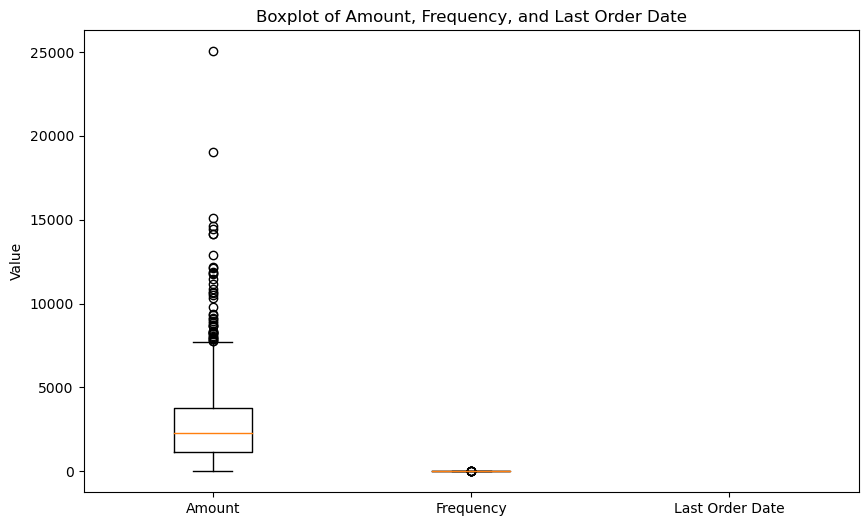

In [113]:
# Convert 'Last Order Date' column to numeric representation
superstore_recency['Last Order Date'] = pd.to_numeric(superstore_recency['Last Order Date'], errors='coerce')

# Create a boxplot for Amount, Frequency, and Last Order Date
plt.figure(figsize=(10, 6))
plt.boxplot([superstore_monetary['Amount'], superstore_frequency['Frequency'], superstore_recency['Last Order Date']],
            labels=['Amount', 'Frequency', 'Last Order Date'])
plt.ylabel('Value')
plt.title('Boxplot of Amount, Frequency, and Last Order Date')
plt.show()


## Amount

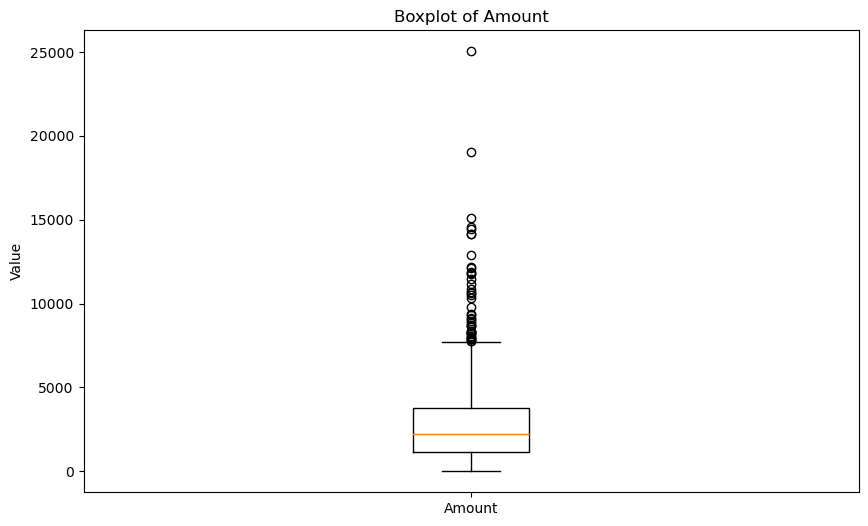

In [114]:
## Create a boxplot of the Amount values
plt.figure(figsize=(10, 6))
plt.boxplot(superstore_monetary['Amount'], labels=['Amount'])
plt.ylabel('Value')
plt.title('Boxplot of Amount')
plt.show()

In [115]:
# Calculate the IQR for 'Amount'
monetary_Q1 = superstore_monetary['Amount'].quantile(0.25)
monetary_Q3 = superstore_monetary['Amount'].quantile(0.25)
monetary_IQR = monetary_Q3 - monetary_Q1

In [116]:
# Define the lower and upper bounds for outliers
monetary_lower_bound = monetary_Q1 - 1.5 * monetary_IQR
monetary_upper_bound = monetary_Q3 + 1.5 * monetary_IQR

In [117]:
# Remove outliers from 'Amount'
superstore_monetary_without_outliers = superstore_monetary[(superstore_monetary['Amount'] >= monetary_lower_bound) & (superstore_monetary['Amount'] <= monetary_upper_bound)]

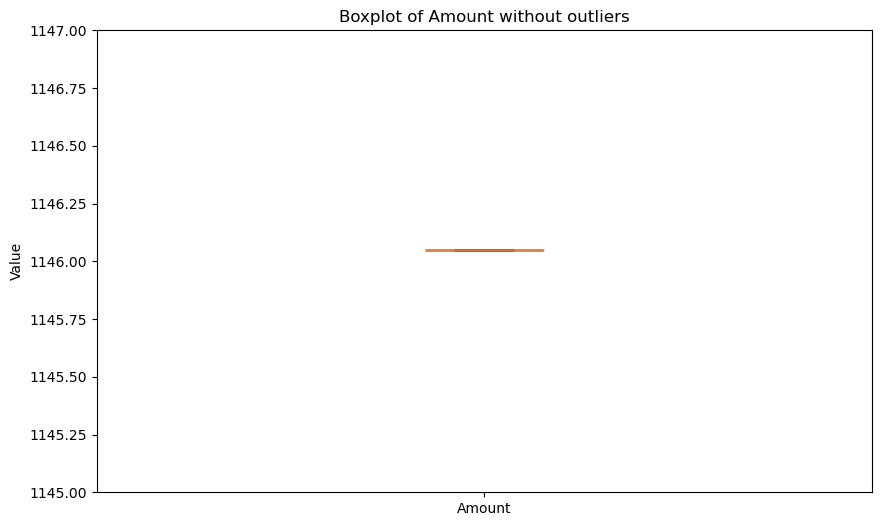

In [136]:
## Create a boxplot of the Amount values without outliers
plt.figure(figsize=(10, 6))
plt.boxplot(superstore_monetary_without_outliers['Amount'], labels=['Amount'])
plt.ylabel('Value')
plt.title('Boxplot of Amount without outliers')

# Set the y-axis limits to zoom in on the range of values
plt.ylim(1145, 1147)  # Adjust the limits according to your desired range

plt.show()

## Frequency

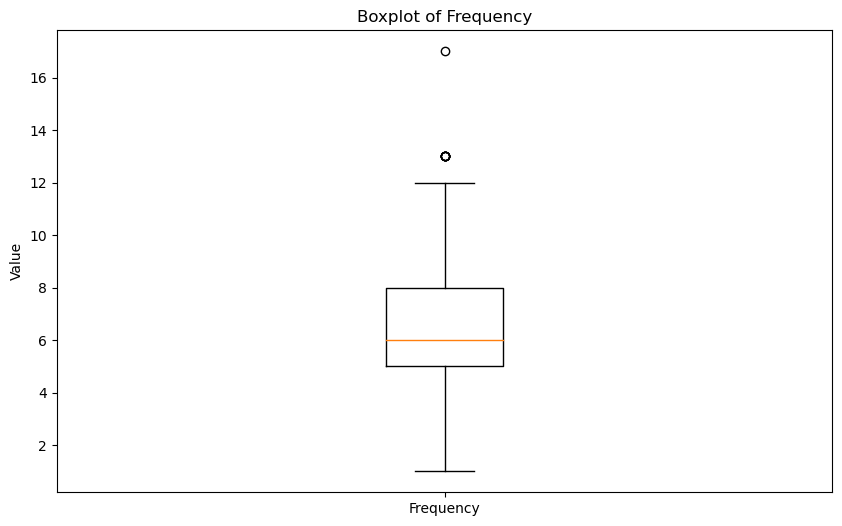

In [119]:
## Create a boxplot of the Amount values
plt.figure(figsize=(10, 6))
plt.boxplot(superstore_frequency['Frequency'], labels=['Frequency'])
plt.ylabel('Value')
plt.title('Boxplot of Frequency')
plt.show()

In [120]:
# Calculate the IQR for 'Frequency'
frequency_Q1 = superstore_frequency['Frequency'].quantile(0.25)
frequency_Q3 = superstore_frequency['Frequency'].quantile(0.75)
frequency_IQR = frequency_Q3 - frequency_Q1

In [121]:
# Define the lower and upper bounds for outliers
frequency_lower_bound = frequency_Q1 - 1.5 * frequency_IQR
frequency_upper_bound = frequency_Q3 + 1.5 * frequency_IQR

In [122]:
# Remove outliers from 'Frequency'
superstore_frequency_no_outliers = superstore_frequency[(superstore_frequency['Frequency'] >= frequency_lower_bound) & (superstore_frequency['Frequency'] <= frequency_upper_bound)]

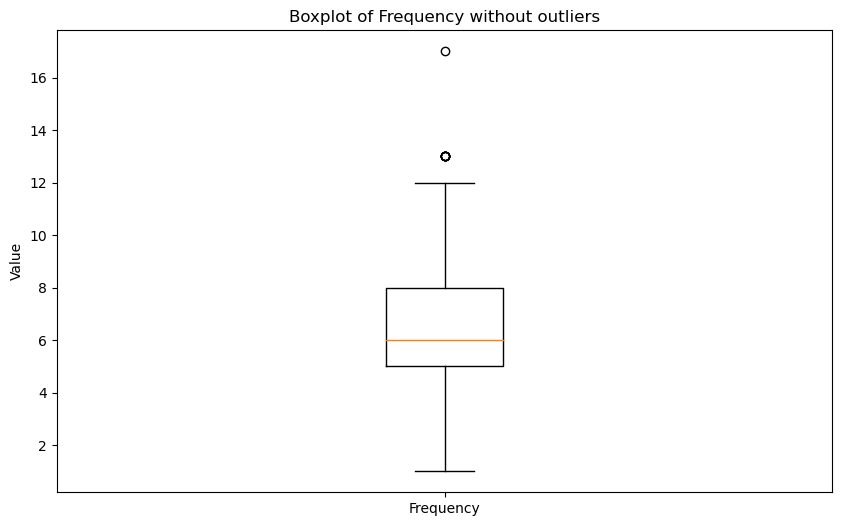

In [123]:
## Create a boxplot of the Amount values without outliers
plt.figure(figsize=(10, 6))
plt.boxplot(superstore_frequency['Frequency'], labels=['Frequency'])
plt.ylabel('Value')
plt.title('Boxplot of Frequency without outliers')
plt.show()

## Last Order Date

In [ ]:
# look at the last day and calculate how many days have happened from the beginning to change the date time into a number of days (days.max days.min)

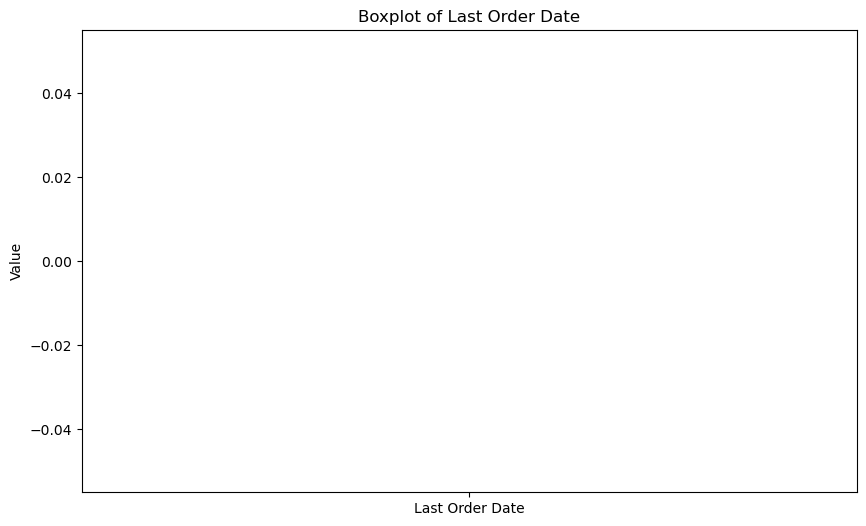

In [124]:
## Create a boxplot of the Last Order Date values 
plt.figure(figsize=(10, 6))
plt.boxplot(superstore_recency['Last Order Date'], labels=['Last Order Date'])
plt.ylabel('Value')
plt.title('Boxplot of Last Order Date')
plt.show()

In [125]:
# Calculate the IQR for 'Last Order Date'
last_order_date_Q1 = superstore_recency['Last Order Date'].quantile(0.25)
last_order_date_Q3 = superstore_recency['Last Order Date'].quantile(0.75)
last_order_date_IQR = last_order_date_Q3 - last_order_date_Q1

In [126]:
# Define the lower and upper bounds for outliers
recency_lower_bound = last_order_date_Q1 - 1.5 * last_order_date_IQR
recency_upper_bound = last_order_date_Q3 + 1.5 * last_order_date_IQR

In [127]:
# Remove outliers from 'Last Order Date'
superstore_recency_without_outliers = superstore_recency[(superstore_recency['Last Order Date'] >= recency_lower_bound) & (superstore_recency['Last Order Date'] <= recency_upper_bound)]

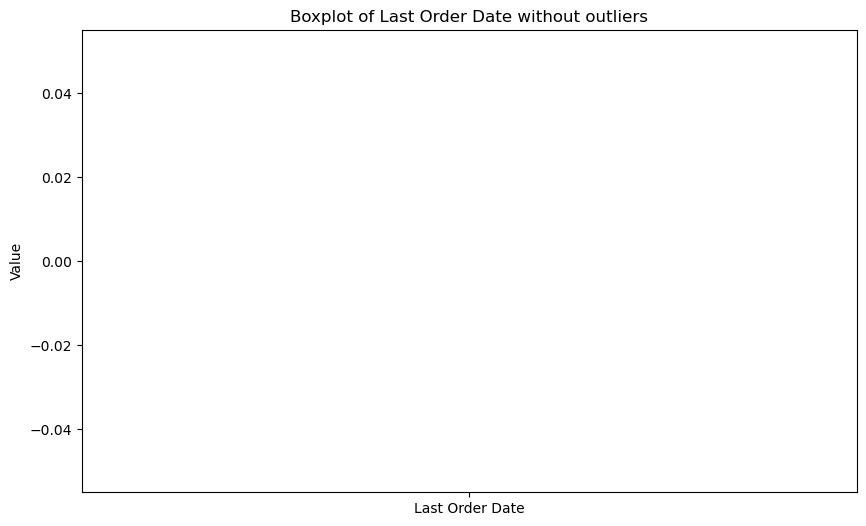

In [129]:
## Create a boxplot of the Last Order Date values without outliers
plt.figure(figsize=(10, 6))
plt.boxplot(superstore_recency_without_outliers['Last Order Date'], labels=['Last Order Date'])
plt.ylabel('Value')
plt.title('Boxplot of Last Order Date without outliers')
plt.show()

## Feature scaling


In [156]:
# Convert 'Last Order Day' column into int
mfr_df['Last Order Day'] = mfr_df['Last Order Day'].dt.strftime(mfr_df['Last Order Day'], '%m-%D-%Y')

# Rescaling the attributes
mfr_df = mfr_df[['Amount', 'Frequency', 'Last Order Date']]

# Instantiate
scaler = StandardScaler()

# fit_transform
mfr_df_scaled = scaler.fit_transform(mfr_df)
mfr_df_scaled.shape

mfr_df_scaled = pd.DataFrame(mfr_df_scaled)
mfr_df_scaled.columns = ['Amount', 'Frequency', 'Last Order Date']
mfr_df_scaled.head()

KeyError: 'Last Order Day'

## Normalization

In [ ]:
# Look at the features individually. Make sure everything looks more or less in the same shape (skewness)
# Try doing Min max

## Building the model


In [ ]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

In [ ]:
# Assign the labels to each data point, and execute the following script.
kmeans.labels_
label_list=kmeans.labels_
sorted(Counter(label_list).items())

## The Elbow Method



In [ ]:
# Determine the optimal number of clusters into which the data may be clustered. 
# The Elbow Method is one of the most popular methods to determine this optimal value of k.
# Elbow-curve /SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

In [ ]:

# plot the SSDs for each n_clusters
plt.plot(ssd)

### Silhouette Analysis



According to the scikit-learn documentation, " can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually."

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

## Train the model


In [ ]:
# Train your final model with the appropriate value of k.


In [ ]:
# Assign the resulting labels to the Monetary, Frequency, and Recency DataFrame (before scaling).


In [ ]:
# Assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

In [ ]:
# Visualize the results# Box plot to visualize Cluster Id vs Amount
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)